# Exploracion de datos

Vamos a realizar un análisis detallado de tres conjuntos de datos que han sido previamente depurados: las reseñas de usuarios (data_reviews), la información de juegos (data_output) y las interacciones entre ellos (data_items). A través de la aplicación de estadísticas descriptivas y visualizaciones, nuestro objetivo es profundizar en las distribuciones, preferencias y tendencias a lo largo del tiempo, identificando las variables más significativas.

### Importamos las librerias necesarias

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

### Extraccion de los datos a partir de los archivos csv

In [79]:
df_reviews = pd.read_csv("data2/user_reviews_limpio6.csv")

In [4]:
df_items = pd.read_csv("data2/user_items_limpio.csv")

In [5]:
df_output = pd.read_csv("data2/output_steam_games_limpio2.csv")

# EDA Dataset Output

Revisamos la estructura, tipo de datos y valores nulos del dataset

In [6]:
df_output.shape

(70701, 8)

In [7]:
df_output.columns

Index(['genres', 'app_name', 'title', 'early_access', 'id', 'developer',
       'price_number', 'release_year'],
      dtype='object')

In [8]:
df_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70701 entries, 0 to 70700
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        70701 non-null  object 
 1   app_name      70701 non-null  object 
 2   title         70701 non-null  object 
 3   early_access  70701 non-null  bool   
 4   id            70701 non-null  int64  
 5   developer     70701 non-null  object 
 6   price_number  70701 non-null  float64
 7   release_year  70701 non-null  int64  
dtypes: bool(1), float64(1), int64(2), object(4)
memory usage: 3.8+ MB


Conclusiones preliminares de la estructura de df_output:
* Se observa que no tenemos valores nulos para ninguna de las variables
* El dataframe contine 70701 registros y 8 columnas donde se detallan caracteristicas de los juegos
* Se puede observar que el dato predominante es el object pero tambien hay tipo bool, int y float

### Variable "Genres"

Esta columna nos brinda informacion acerca de los generos que poseen los juegos, cabe destacar que un juego puede tener mas de un genero asociado al mismo

In [9]:
print("Valores únicos de genres:", df_output["genres"].unique())

Valores únicos de genres: ['Action' 'Casual' 'Indie' 'Simulation' 'Strategy' 'Free to Play' 'RPG'
 'Sports' 'Adventure' 'Racing' 'Massively Multiplayer' 'Early Access'
 'Animation &amp; Modeling' 'Video Production' 'Web Publishing'
 'Education' 'Software Training' 'Utilities' 'Design &amp; Illustration'
 'Audio Production' 'Photo Editing' 'Accounting']


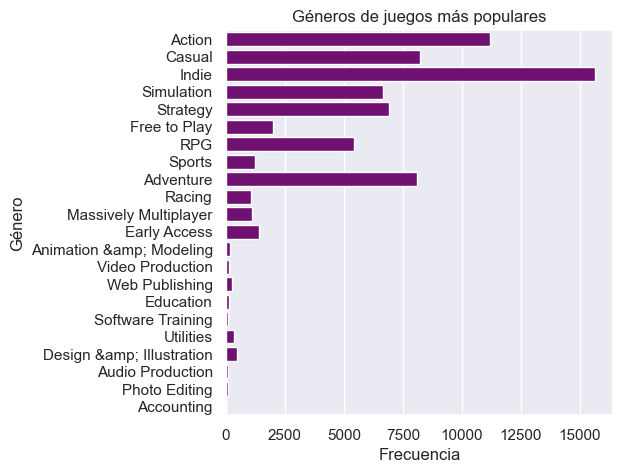

In [10]:
plt.figure(figsize=(5, 5))
sns.countplot(data= df_output, y="genres", color="purple")
plt.title("Géneros de juegos más populares")
plt.ylabel("Género")
plt.xlabel("Frecuencia")
plt.show()

In [11]:
ranking_generos = df_output["genres"].value_counts()
ranking_generos.head(5)

genres
Indie        15634
Action       11177
Casual        8211
Adventure     8111
Strategy      6893
Name: count, dtype: int64

Podemos visualizar que el top cinco de generos de juegos mas populares son: Indie, Action, Casual, Adventure y Strategy

### Variable "Developer"

Se procede analizar quienes son los desarrolladores que mas contribuyen a la creacion de juegos de Steam, a partir de la grafica de frecuencia

In [12]:
ranking_developers = df_output["developer"].value_counts()
ranking_developers.head(5)

developer
Ubisoft - San Francisco    2516
SmiteWorks USA, LLC        2364
DL Softworks                495
Ronimo Games                379
Sin datos                   350
Name: count, dtype: int64

En el caso de esta variable solo se grafican el top 10 de desarrolladores dado que son los mas relevantes para el analisis

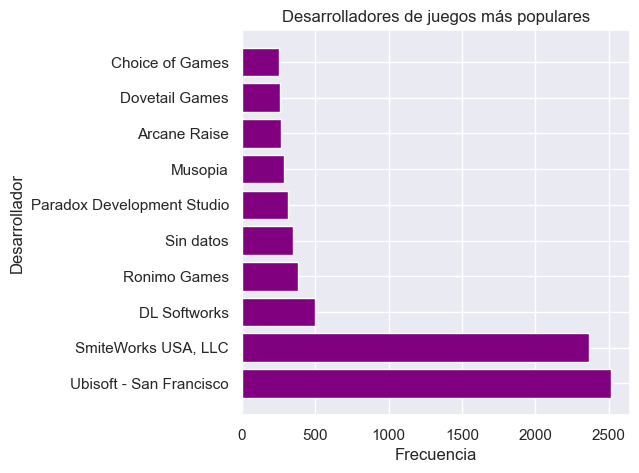

In [13]:
top_10_developer = df_output["developer"].value_counts().head(10)
plt.figure(figsize=(5, 5))
plt.barh(top_10_developer.index, top_10_developer.values, color="purple")
plt.title("Desarrolladores de juegos más populares")
plt.ylabel("Desarrollador")
plt.xlabel("Frecuencia")
plt.show()


Verificamos que hay una clara diferencia de entre frecuencias y que los desarrolladores mas importantes son: Ubisoft - San Francisco y SmiteWorks USA, LLC

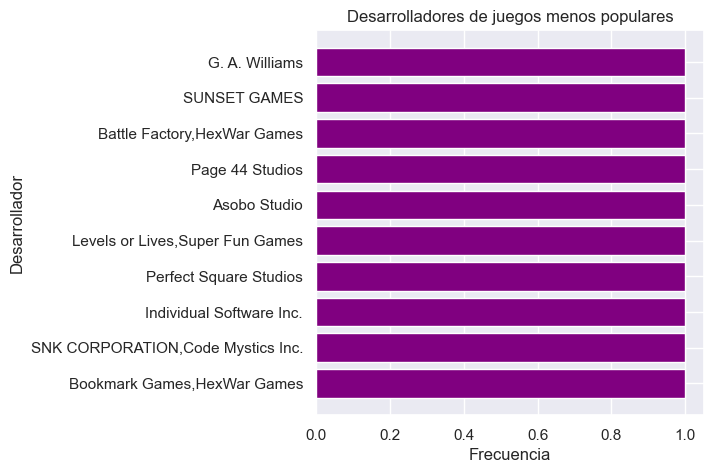

In [14]:
top_10_developer_tail = df_output["developer"].value_counts().tail(10)
plt.figure(figsize=(5, 5))
plt.barh(top_10_developer_tail.index, top_10_developer_tail.values, color="purple")
plt.title("Desarrolladores de juegos menos populares")
plt.ylabel("Desarrollador")
plt.xlabel("Frecuencia")
plt.show()


In [15]:
ranking_developers = df_output["developer"].value_counts()
ranking_developers.tail(5)

developer
Asobo Studio                   1
Page 44 Studios                1
Battle Factory,HexWar Games    1
SUNSET GAMES                   1
G. A. Williams                 1
Name: count, dtype: int64

En este caso podemos observar que los desarrolladores que menos juegos desarrollaron para la plataforma son: Asobo Studio, Page 44 Studios, Battle Factory,HexWar Games, SUNSET GAMES y G. A. Williams

### Variables "app_name", "id" y "title"

Las tres variables nos representan los juegos tanto sea para nombrear como para asignarles una serie numerica identificatoria

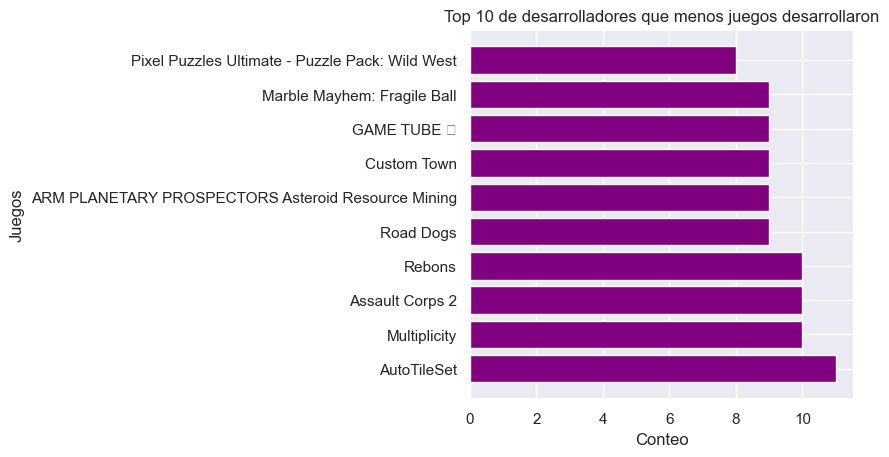

In [36]:
top_10_titles = df_output["title"].value_counts().head(10)

plt.barh(top_10_titles.index, top_10_titles.values, color="purple")
plt.title("Top 10 de desarrolladores que menos juegos desarrollaron")
plt.xlabel("Conteo")
plt.ylabel("Juegos")
plt.subplots_adjust(left=0.3)
plt.show()

### Variable "release_year"
Esta variable nos indica el año en el que fue lanzado el juego, por lo que procederemos a analizar la frecuencia de los años

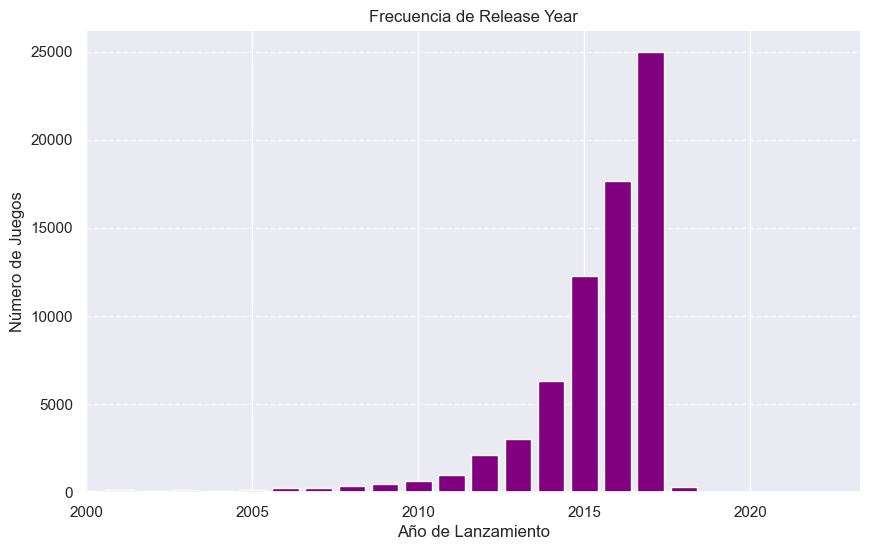

In [17]:
release_year_counts = df_output["release_year"].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(release_year_counts.index, release_year_counts.values, color="purple")
plt.title("Frecuencia de Release Year")
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Número de Juegos")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xlim(left=2000)
plt.show()


In [18]:
release_year_counts = df_output["release_year"].value_counts()
release_year_counts.head(5)

release_year
2017    24967
2016    17667
2015    12256
2014     6341
2013     3016
Name: count, dtype: int64

A partir del analisis realizado observamos que el 2017 fue el año donde mas juegos fueron lanzados

<Figure size 1400x800 with 0 Axes>

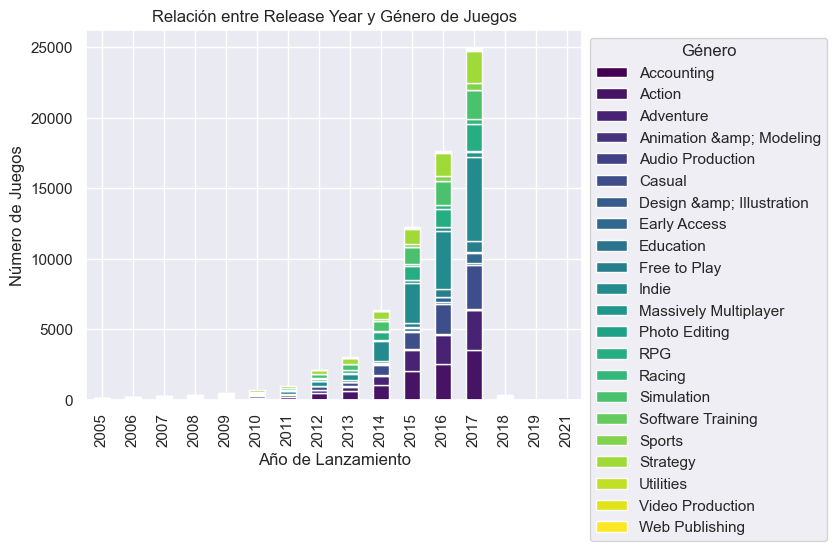

In [19]:
pivot_table = df_output.pivot_table(index="release_year", columns="genres", aggfunc="size", fill_value=0)
pivot_table = pivot_table[pivot_table.index >= 2005]
plt.figure(figsize=(14, 8))
pivot_table.plot(kind="bar", stacked=True, colormap="viridis")
plt.title("Relación entre Release Year y Género de Juegos")
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Número de Juegos")
plt.legend(title="Género", bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

<Figure size 1400x800 with 0 Axes>

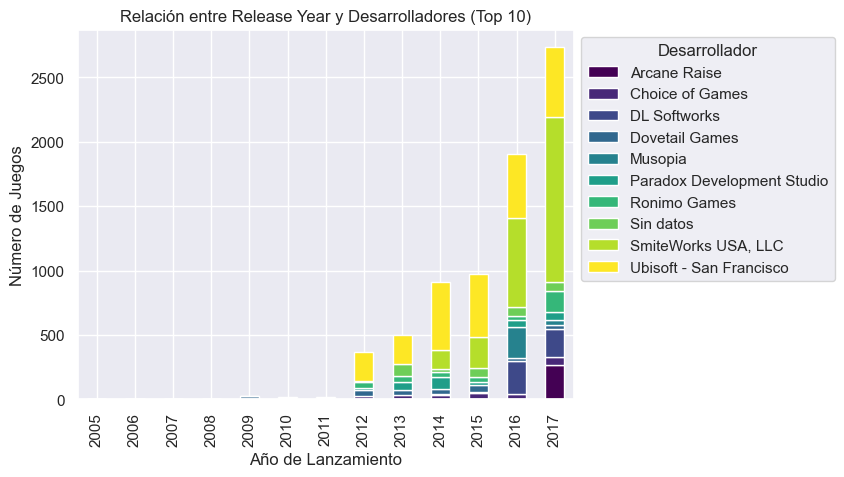

In [21]:
top_10_developers_ = df_output["developer"].value_counts().head(10).index
df_top_developers = df_output[df_output["developer"].isin(top_10_developers_)]
pivot_table_developers = df_top_developers.pivot_table(index='release_year', columns='developer', aggfunc='size', fill_value=0)
pivot_table_developers = pivot_table_developers[pivot_table_developers.index >= 2005]
plt.figure(figsize=(14, 8))
pivot_table_developers.plot(kind="bar", stacked=True, colormap="viridis")
plt.title("Relación entre Release Year y Desarrolladores (Top 10)")
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Número de Juegos")
plt.legend(title="Desarrollador", bbox_to_anchor=(1, 1), loc="upper left")
plt.show()


# EDA Items

Revisamos la estructura, tipo de datos y valores nulos del dataset

In [22]:
df_items.shape

(3002801, 6)

In [23]:
df_items.columns

Index(['user_id', 'items_count', 'steam_id', 'item_id', 'item_name',
       'playtime_forever'],
      dtype='object')

In [24]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002801 entries, 0 to 3002800
Data columns (total 6 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_id           object 
 1   items_count       int64  
 2   steam_id          int64  
 3   item_id           int64  
 4   item_name         object 
 5   playtime_forever  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 137.5+ MB


In [25]:
df_items.isnull().sum()

user_id             0
items_count         0
steam_id            0
item_id             0
item_name           0
playtime_forever    0
dtype: int64

In [29]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_items.describe()

,items_count,steam_id,item_id,playtime_forever
count,3002801.000,3002801.000,3002801.000,3002801.000
mean,323.651,76561198049806320.000,202377.222,773.745
std,723.548,39077324.321,122934.396,4043.478
min,1.000,76561197960269200.000,20.000,0.000
25%,70.000,76561198027343232.000,91310.000,0.000
50%,135.000,76561198052602768.000,224260.000,43.000
75%,275.000,76561198072940784.000,285900.000,342.000
max,7762.000,76561198329548336.000,530720.000,635295.000


Conclusiones preliminares de la estructura de df_items:

* Se observa que no tenemos valores nulos para ninguna de las variables
* El dataframe contine 3002801 registros y 6 columnas donde se detallan los juegos de cada usuario junto con el tiempo que lo consumieron
* Se puede observar que el dato predominante es el int pero tambien hay tipo object y float

### Variable "user_id"

Esta variable es un identificador unico para cada usuario

In [27]:
if df_items["user_id"].nunique() == len(df_items):
    print("Todos los user_ids son únicos.")
else:
    print("Hay duplicados en los user_ids.")

Hay duplicados en los user_ids.


En este caso podemos verificar que tenemos valores duplicados ya que cada usuario puede hacer consumido mas de un juego y el dataframe registra cada juego consumido por usuario y no solo por usuario

### Variable "items_count"
Esta variable nos indica la cantidad de juegos consumidos por cada usuario

In [31]:
df_items["items_count"].describe()

count   3002801.000
mean        323.651
std         723.548
min           1.000
25%          70.000
50%         135.000
75%         275.000
max        7762.000
Name: items_count, dtype: float64

Podemos observar que el 75% de los usuarios consumieron entre 1 a 275 juegos mientras que el maximo de juegos consumidos por usuario alcanzo un valor de 7762 y el minimo un valor de 1. El promedio de juegos consumido por usuario es de 324 juegos

### Variable "item_name"

Esta variable nos indica el nombre del juego que cada usuario consumio

In [34]:
top_10_juegos = df_items["item_name"].value_counts().head(10)
top_10_juegos

item_name
Dota 2 Test           49571
Unturned              38682
Left 4 Dead 2         37044
Left 4 Dead 2 Beta    37044
Terraria              29239
Warframe              25807
Portal 2              24465
PAYDAY 2              23729
Robocraft             21785
Borderlands 2         21029
Name: count, dtype: int64

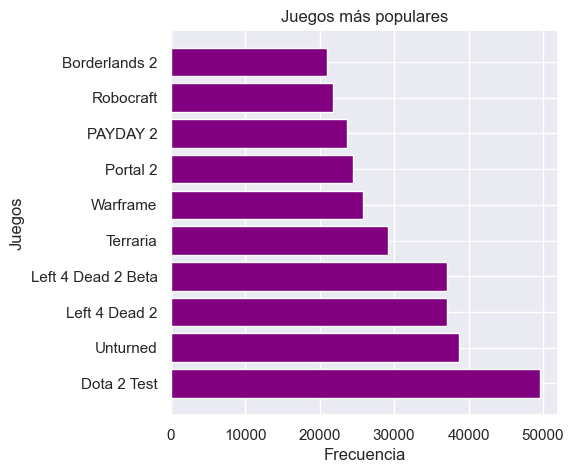

In [35]:
plt.figure(figsize=(5, 5))
plt.barh(top_10_juegos.index, top_10_juegos.values, color="purple")
plt.title("Juegos más populares")
plt.ylabel("Juegos")
plt.xlabel("Frecuencia")
plt.show()

### Variable "playtime_forever"

Esta variable nos indica el tiempo de juego que consumio el usuario por juego

In [43]:
df_items["playtime_hours"] = df_items["playtime_forever"]/60
df_items["playtime_hours"].describe()

count   3002801.000
mean         12.896
std          67.391
min           0.000
25%           0.000
50%           0.717
75%           5.700
max       10588.250
Name: playtime_hours, dtype: float64

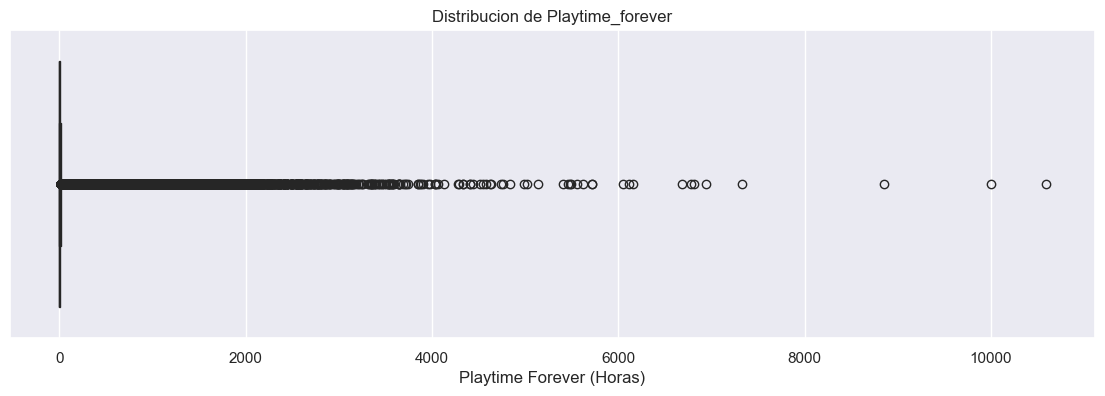

In [46]:
plt.figure(figsize=(14, 4))
sns.boxplot(x=df_items["playtime_hours"], color="purple")
plt.title("Distribucion de Playtime_forever")
plt.xlabel("Playtime Forever (Horas)")
plt.show()

In [49]:
Q1 = df_items["playtime_hours"].quantile(0.25)
Q3 = df_items["playtime_hours"].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df_items[(df_items["playtime_hours"] < lower_limit) | (df_items["playtime_hours"] > upper_limit)]
num_outliers = len(outliers)
print(f'Número de valores atípicos: {num_outliers}')
outliers_up = df_items[(df_items["playtime_hours"] > upper_limit)]
num_outliers_up = len(outliers_up)
print(f'Número de valores atípicos: {num_outliers_up}')
print(upper_limit)

Número de valores atípicos: 433286
Número de valores atípicos: 433286
14.25


A partir de las estadisticas descriptivas detalladas arribas podemos concluir que el 75% de los usuarios consumen alrededor de 0 a 5.700 hs un juego mientras que el valor maximo es de 10588.250 hs , aunque el valor promedio de consumo de un juego es de 12.896hs. Tambien podemos observar que tenemos 433286 valores atipicos que se encuentran por encima del limite de 14.25hs

### Variable "item_id"

Esta es una variable identificatoria de cada juego

In [59]:
df_items["item_id"].value_counts().head(10)

item_id
205790    49571
304930    38682
550       37044
223530    37044
105600    29239
230410    25807
620       24465
218620    23729
301520    21785
49520     21029
Name: count, dtype: int64

Estos son los item_id que mas consumieron los usuarios

Aqui abajo se pueden observar los items que fueron mas tiempo consumidos (en horas)

In [70]:
total_playtime_by_item = df_items.groupby("item_id")["playtime_hours"].sum().sort_values(ascending=False)
top_items = total_playtime_by_item.head(5)
top_items

item_id
105600   2582909.017
230410   2067128.383
550      1703157.050
218620   1662731.900
252490   1352006.933
Name: playtime_hours, dtype: float64

### "user_id" que mas tiempo de juego consumieron

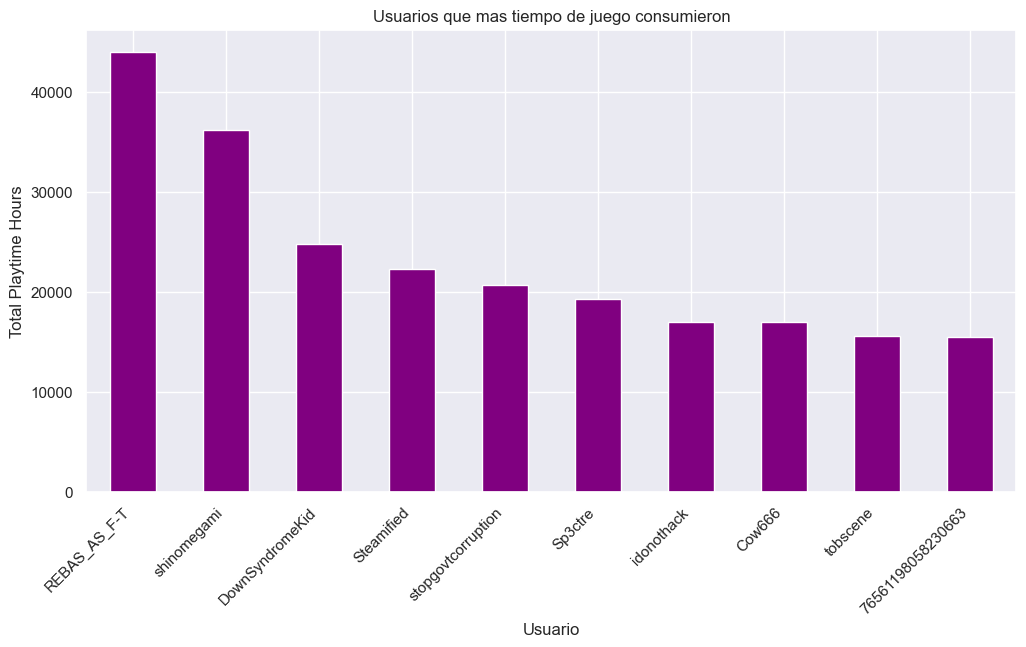

In [53]:

total_playtime_by_user = df_items.groupby("user_id")["playtime_hours"].sum().sort_values(ascending=False)
top_users = total_playtime_by_user.head(10)

plt.figure(figsize=(12, 6))
top_users.plot(kind="bar", color="purple")
plt.title("Usuarios que mas tiempo de juego consumieron")
plt.xlabel("Usuario")
plt.ylabel("Total Playtime Hours")
plt.xticks(rotation=45, ha="right")
plt.show()


### "user_id" que mas juegos consumieron

In [54]:
df_ordenado_x_itemcount = df_items.sort_values(by="items_count", ascending=False)

usuario_mayor_item_count = df_ordenado_x_itemcount.iloc[0]["user_id"]
mayor_item_count = df_ordenado_x_itemcount.iloc[0]["items_count"]

print(f'Usuario con el mayor item_count: {usuario_mayor_item_count}')
print(f'Mayor item_count: {mayor_item_count}')


Usuario con el mayor item_count: phrostb
Mayor item_count: 7762


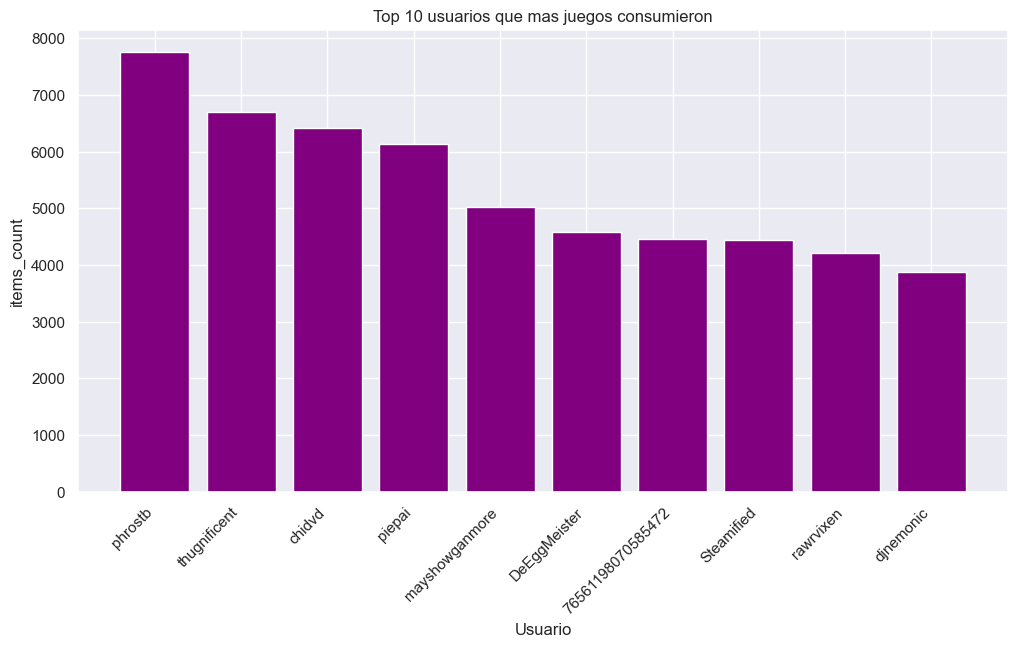

In [57]:
items_count_user = df_items.groupby("user_id")["items_count"].max().sort_values(ascending=False)
top_users = items_count_user.head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_users.index, top_users.values, color="purple")
plt.title("Top 10 usuarios que mas juegos consumieron")
plt.xlabel("Usuario")
plt.ylabel("items_count")
plt.xticks(rotation=45, ha="right")
plt.show()

# EDA Reviews

Revisamos la estructura, tipo de datos y valores nulos del dataset

In [80]:
df_reviews.shape

(57538, 7)

In [81]:
df_reviews.columns

Index(['user_id', 'user_url', 'item_id', 'helpful', 'recommend', 'year_posted',
       'sentiment_analysis'],
      dtype='object')

In [82]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57538 entries, 0 to 57537
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             57538 non-null  object
 1   user_url            57538 non-null  object
 2   item_id             57538 non-null  int64 
 3   helpful             57538 non-null  object
 4   recommend           57538 non-null  bool  
 5   year_posted         57538 non-null  int64 
 6   sentiment_analysis  57538 non-null  int64 
dtypes: bool(1), int64(3), object(3)
memory usage: 2.7+ MB


In [83]:
df_reviews.describe()

,item_id,year_posted,sentiment_analysis
count,57538.000,57538.000,57538.000
mean,169504.798,2013.952,1.292
std,132008.964,0.881,0.693
min,10.000,2010.000,0.000
25%,8930.000,2013.000,1.000
50%,218230.000,2014.000,1.000
75%,261640.000,2015.000,2.000
max,527340.000,2015.000,2.000
